In [105]:
import numpy as np
import sys, os
import pandas as pd
from datetime import datetime
import scipy.io as sio

# statistical analysis 
from scipy import stats

# user defined module in .ipynb
import import_nbmodule
sys.path.append(os.path.join('..'))
from util.folder_extract import animal_folder

In [106]:
animal = 'Pinky'

# extract the metainf folder of animal
_, _, animetafolder = animal_folder(animal = animal)

# read the skb information in pinky_skbinf.csv file
skbinf = pd.read_csv(os.path.join(animetafolder, 'pinky_skbinf.csv')) 

# row numbers that the event time of the corresponing skb trials has been extracted
idx_eventtimeextracted = np.where(skbinf['eventtimeextracted'] == 'Yes')

In [108]:
drive = 'Y:';
drivefolder = os.path.join(drive, 'Animals2', animal, 'Recording', 'Processed', 'DataDatabase')
tevents_normal = []
tevents_mild = []
for idx in idx_eventtimeextracted[0]:
    if skbinf['YingUsed'][idx] == 'Y':
        dateexp = datetime.strptime(str(skbinf['dateexp'][idx]), '%y%m%d')
        bkma = skbinf['bkma'][idx]
        bktdt = skbinf['bktdt'][idx]
        pdcon = skbinf['PDCondition'][idx]

        loadfolder = os.path.join(drivefolder, animal + '_' + datetime.strftime(dateexp, '%m%d%y'), 'Block-' + str(bktdt))
        loadfile = 'MASKBeventtime_' + animal + '_' + datetime.strftime(dateexp, '%Y%m%d') + '_mabk' + str(bkma) + '_tdtbk' + str(bktdt) + '.mat'

        # load the event time in .mat file
        dat = sio.loadmat(os.path.join(loadfolder, loadfile), variable_names = ['t_target', 't_reachonset', 't_touch', 't_return', 't_mouth'])

        # combine all the event time into one matrix tevent
        tevent = np.concatenate((dat['t_target'], dat['t_reachonset'], dat['t_touch'], dat['t_return'], dat['t_mouth']), axis = 1)
        if pdcon == 'normal':
            if len(tevents_normal) == 0:
                tevents_normal = tevent
            else:
                tevents_normal = np.concatenate((tevents_normal, tevent), axis = 0)
        elif pdcon == 'mild':
            if len(tevents_mild) == 0:
                tevents_mild = tevent
            else:
                tevents_mild = np.concatenate((tevents_mild, tevent), axis = 0)
    

In [122]:
col_target, col_reachonset, col_touch, col_return, col_mouth = 0, 1, 2, 3, 4
cols = [col_target] + [col_reachonset]
t_mild = np.squeeze((tevents_mild[:,cols[1]] - tevents_mild[:,cols[0]]));
t_normal = np.squeeze((tevents_normal[:,cols[1]] - tevents_normal[:,cols[0]]));
print(stats.ttest_ind(t_mild, t_normal)[1])
print(round(np.mean(t_mild),4))
print(round(np.mean(t_normal),4))

0.00202888972040924
0.2946
0.2371


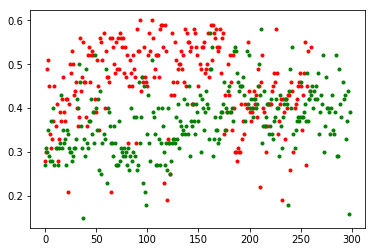

In [121]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(t_mild[np.intersect1d(np.where(t_mild<0.6)[0], np.where(t_mild>0.15)[0]) ],'.r', label = 'mild')
plt.plot(t_normal[np.intersect1d(np.where(t_normal<0.6)[0], np.where(t_normal>0.15)[0]) ],'.g', label = 'normal')
plt.show()


In [99]:
idx = np.where(t_mild<0.5)[0]
print(t_mild[idx])

[0.36 0.47 0.47 0.29 0.31 0.37 0.36 0.33 0.33 0.36 0.34 0.34 0.43 0.44
 0.38 0.35 0.36 0.2  0.37 0.47 0.35 0.34 0.33 0.43 0.32 0.32 0.33 0.36
 0.31 0.37 0.36 0.33 0.33 0.36 0.34 0.34 0.43 0.44 0.38 0.35 0.36 0.2
 0.37 0.47 0.35 0.34 0.33 0.43 0.32 0.32 0.33 0.36 0.35 0.33 0.32 0.32
 0.29 0.48 0.37 0.34 0.48 0.3  0.43 0.37 0.36 0.32 0.39 0.35 0.49 0.33
 0.37 0.38 0.35 0.43 0.4  0.42 0.3  0.36 0.41 0.38 0.32 0.35 0.38 0.4
 0.36 0.48 0.32 0.35 0.12 0.38 0.42 0.35 0.35 0.38 0.44 0.42 0.39 0.42
 0.33 0.37 0.34 0.34 0.2  0.48 0.34 0.04 0.31 0.19 0.19 0.46 0.22 0.23
 0.43 0.15 0.14 0.2  0.3  0.04 0.19 0.09 0.08 0.26 0.21 0.29 0.28 0.35
 0.2  0.31 0.3  0.47 0.47 0.44 0.44 0.33 0.34 0.29 0.35 0.45 0.29 0.07
 0.4  0.34 0.33 0.37 0.33 0.39 0.32 0.4  0.33 0.41 0.49 0.43 0.45 0.45
 0.35 0.4  0.48 0.46 0.42 0.41 0.42 0.43 0.38 0.42 0.45 0.43 0.44 0.31
 0.47 0.49 0.38 0.44 0.45 0.4  0.47 0.39 0.43 0.38 0.43 0.48 0.47 0.47
 0.47 0.34 0.27 0.39 0.34 0.44 0.42 0.33 0.32 0.33 0.31 0.47 0.41 0.35
 0.05 0.

In [ ]:
import cv2
import numpy as np
from threading import Thread, Lock

import tkinter as tk
from tkinter import filedialog
import os
import time
import datetime
import csv
import sys, getopt

videoCap = cv2.VideoCapture(self.camID)